In [7]:
#import dataset

from google.colab import files


uploaded = files.upload()



Saving Instagram data.csv to Instagram data.csv


In [8]:
#import libraries and read dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())


   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [9]:
#check for null values

data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [10]:
#drop the null value

data = data.dropna()

In [11]:
#understanding the data types contained

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


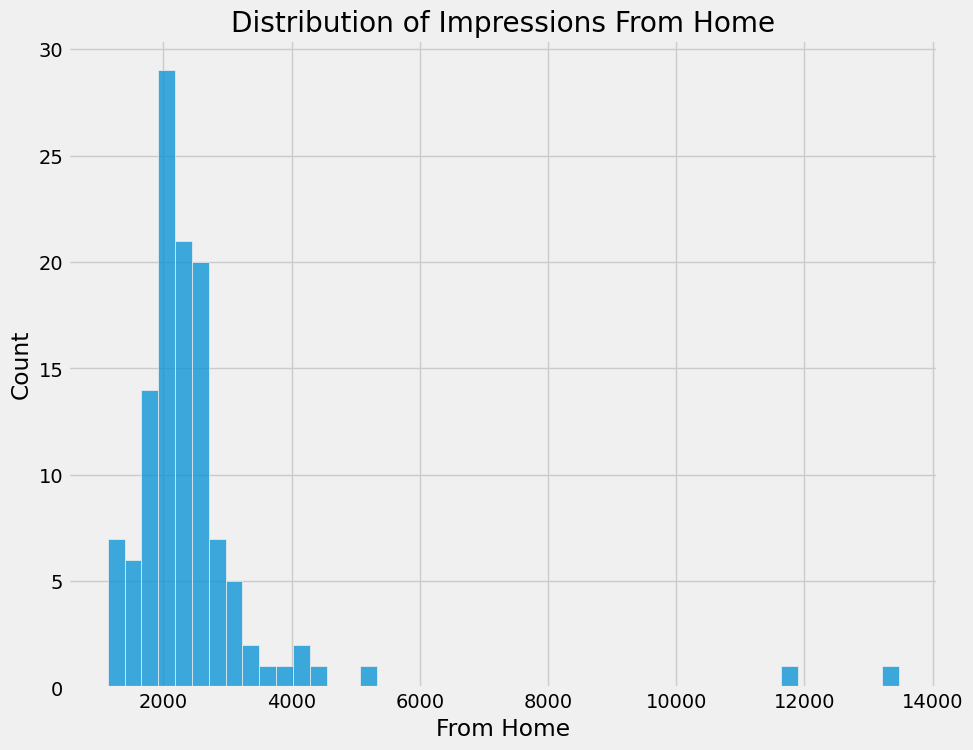

In [15]:
#checking the distribution of reach from home

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'])
plt.show()

#outcome: not reaching people everyday

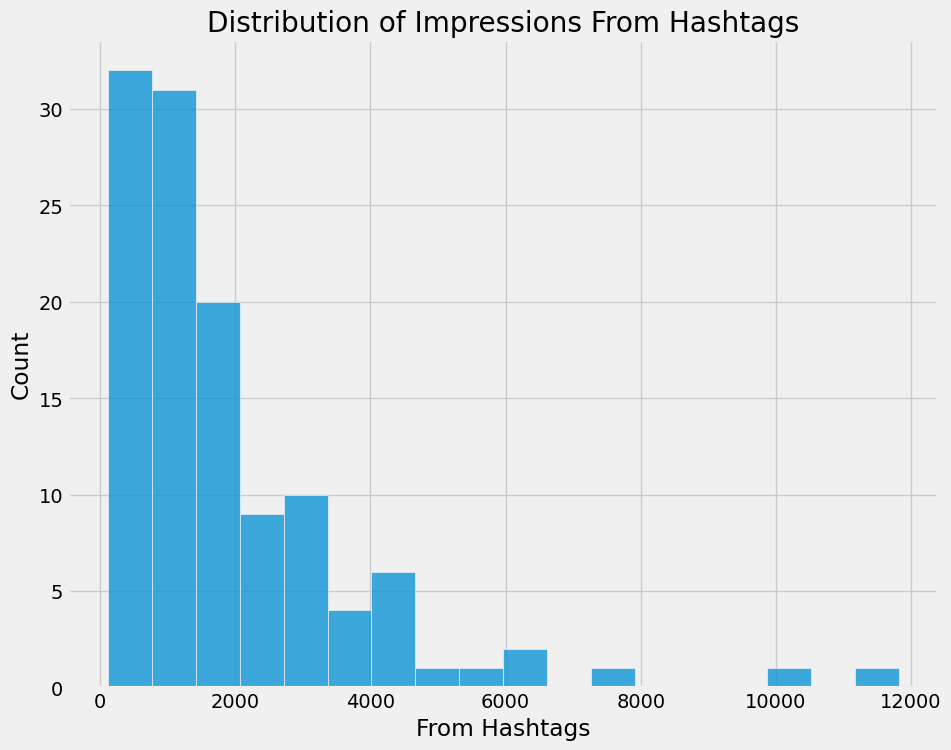

In [16]:
#finding the impressions from hashtags

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'])
plt.show()

#outcome: reaching some new followers but not for every post

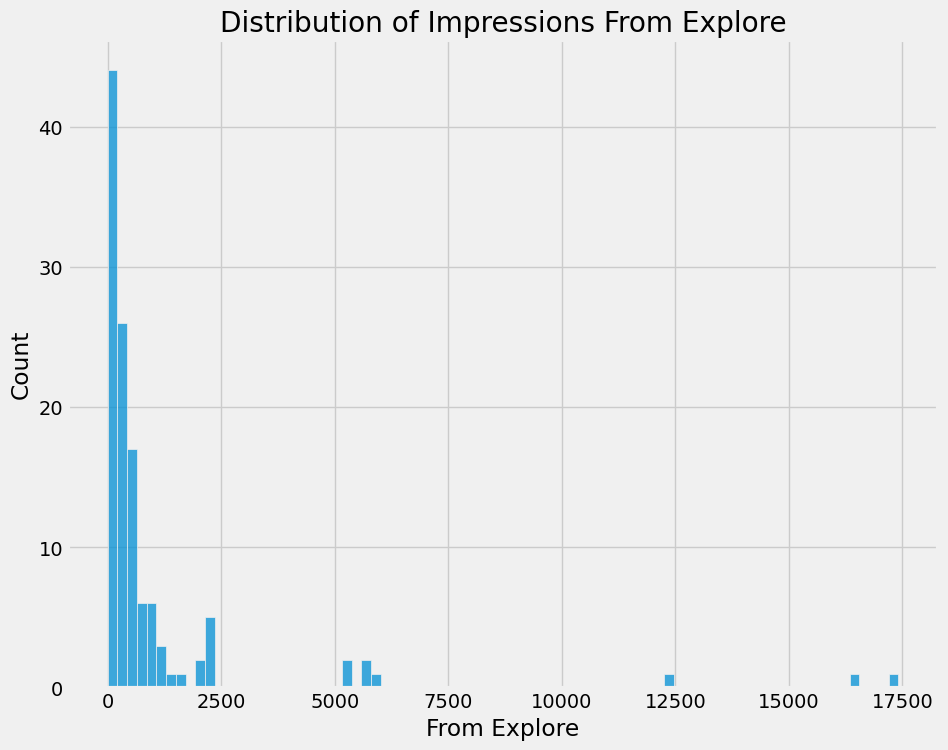

In [17]:
#checking impressions from explore page

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'])
plt.show()

#outcome: receiving reach but very low as compared

In [18]:
#checking % impressions from sources

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

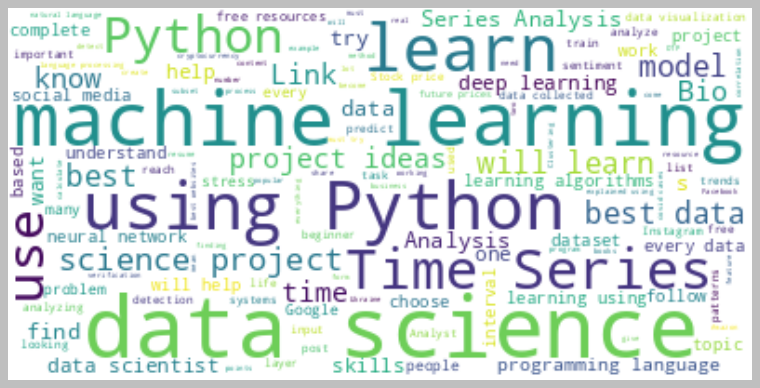

In [19]:
#analyzing my insta content by checking which captions I use the most(dataset contains the hashtags and captions)

text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

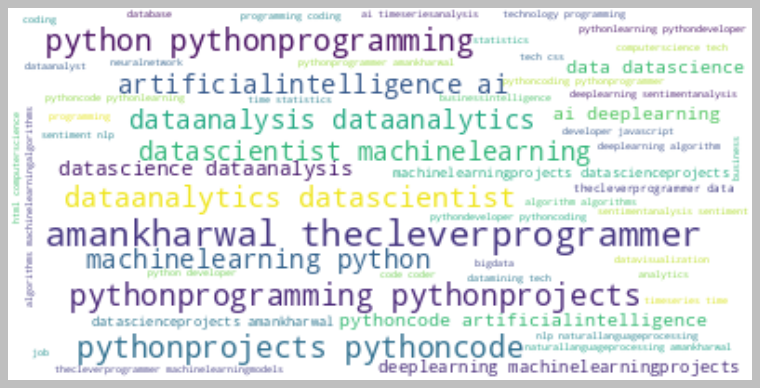

In [20]:
#analyzing my insta content by checking which hashtags I use the most(dataset contains the hashtags and captions)

text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#checking likes vs impressions

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols",
                    title = "Relationship Between Likes and Impressions")
figure.show()

#outcome is linear

In [22]:
#checking comments vs impressions

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols",
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

#outcome: comments are not affecting the impression

In [23]:
#checking share vs impressions

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols",
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

#outcome is almost linear

In [24]:
#checking saves vs impression

figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols",
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

#outcome: linear again

In [25]:
#checking corelation of impression with the above mentioned columns

correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


<ipython-input-25-47d3c60a8f44>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [26]:
#finding conversion rate of followers gained from profile visit

conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [27]:
#relation between profile visit vs follower gain

figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

#outcome: linear

In [28]:
#splitting data into train and test sets

x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                   'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [29]:
#training Passive Aggressive Regressor to predict intsa post reach

model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.6560803331312812

In [30]:
#predict the insta post reach by inputting my own values

# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

#returns the learned label

array([9507.20704268])